In [53]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

### Define functions

In [54]:
# Read the metrics for each subset and incorporate the diversity information for each subsample
def read_results(dataset):

    file_path = f"../data/output/results_{dataset}.csv"
    df = pd.read_csv(file_path).drop("Unnamed: 0", axis=1)

    info_file = f"../data/subsamples/source/div_subsamples_{dataset}.csv"
    subsamples_info = pd.read_csv(info_file).drop("Unnamed: 0", axis=1)

    merged_df = pd.merge(df, subsamples_info, on="subsample").sort_values("vs")

    return merged_df

In [55]:
def plot_metrics(df,name):
    colors = sns.color_palette("Set2", 5) 

    # Create a scatter plot for each metric
    for i, metric in enumerate(['mcc', 'f1', 'precision', 'recall', 'roc_auc']):
        plt.plot(df['vs'], df[metric], color=colors[i], label=metric)

        # Adding labels and title
    plt.xlabel('VS')
    plt.ylabel('Performance Metrics')
    plt.title(name)
    plt.legend(title='Metrics')

    plt.legend(title='Metrics', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

    plt.tight_layout()
    plt.show()

In [56]:
def regression_vs_metric(df, metric):
    X = df['vs']  
    y = df[metric]  

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(model.summary())

In [57]:
def calculate_correlations(df):
    results = []
    performance_metrics = ['mcc', 'f1', 'precision', 'recall', 'roc_auc']


    # Calculate Pearson and Spearman correlation and p-values for each metric
    for metric in performance_metrics:
        pearson_corr, pearson_p = pearsonr(df['vs'], df[metric])
        spearman_corr, spearman_p = spearmanr(df['vs'], df[metric])

        pearson_corr_str = f"{pearson_corr:.3f}"
        spearman_corr_str = f"{spearman_corr:.3f}"
        pearson_p_str = f"{pearson_p:.3f}"
        spearman_p_str = f"{spearman_p:.3f}"

        if pearson_p < 0.01:
            pearson_corr_str += "**"
        elif pearson_p < 0.05:
            pearson_corr_str += "*"

        if spearman_p < 0.01:
            spearman_corr_str += "**"
        elif spearman_p < 0.05:
            spearman_corr_str += "*"
        
        results.append({
            'Metric': metric,
            'Pearson Correlation': pearson_corr_str,
            'Pearson P-value': pearson_p,
            'Spearman Correlation': spearman_corr_str,
            'Spearman P-value': spearman_p
        })

    # Convert results to a DataFrame for display
    results_df = pd.DataFrame(results)

    return results_df

### Analysis for each dataset (subset size N=500)

In [58]:
annomatic = read_results("annomatic")
babe = read_results("babe")
basil = read_results("basil")

results = {"ANNOMATIC": annomatic, "BABE": babe, "BASIL": basil}

In [ ]:
# basil.sort_values(by="vs")

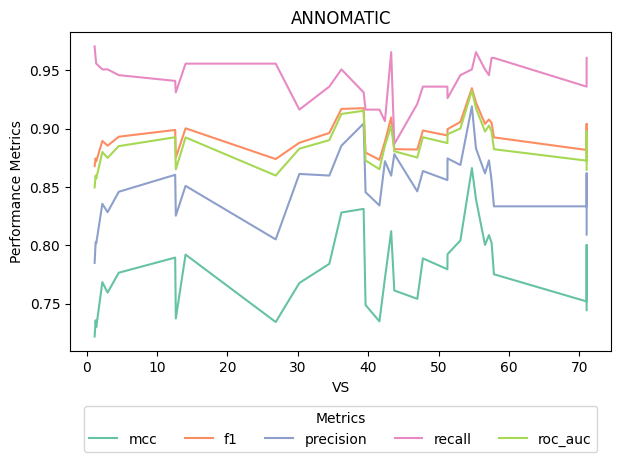

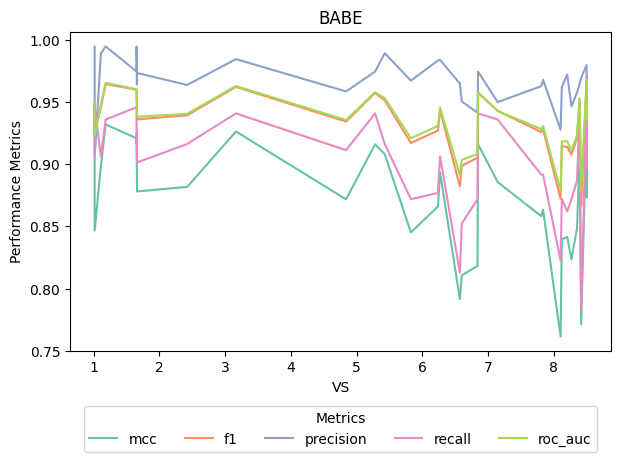

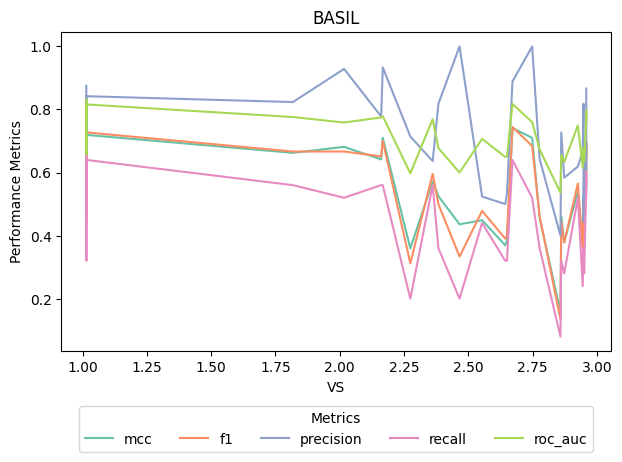

In [60]:
for name, df in results.items():
    plot_metrics(df, name)

In [61]:
for name, df in results.items():
    print(f'\n{name}')
    regression_vs_metric(df, "roc_auc")


ANNOMATIC
                            OLS Regression Results                            
Dep. Variable:                roc_auc   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     7.550
Date:                Thu, 05 Dec 2024   Prob (F-statistic):            0.00991
Time:                        14:27:59   Log-Likelihood:                 87.931
No. Observations:                  33   AIC:                            -171.9
Df Residuals:                      31   BIC:                            -168.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8718      0.006    145.9

In [62]:

corr_annomatic= calculate_correlations(annomatic)
corr_babe= calculate_correlations(babe)
corr_basil= calculate_correlations(basil)

print("ANNOMATIC")
print(corr_annomatic.to_string(index=False))  #

print("ANNOMATIC_1500")
print(corr_annomatic_1500.to_string(index=False))  #

print("\nBABE")
print(corr_babe.to_string(index=False))  #

print("\nBASIL")
print(corr_basil.to_string(index=False))  

ANNOMATIC
   Metric Pearson Correlation  Pearson P-value Spearman Correlation  Spearman P-value
      mcc              0.420*         0.014859              0.443**          0.009789
       f1              0.412*         0.017290               0.427*          0.013086
precision             0.458**         0.007315               0.403*          0.020127
   recall              -0.124         0.491740               -0.010          0.957044
  roc_auc             0.443**         0.009910              0.451**          0.008398
ANNOMATIC_1500
   Metric Pearson Correlation  Pearson P-value Spearman Correlation  Spearman P-value
      mcc              -0.213         0.233741               -0.258          0.146447
       f1              -0.313         0.075838              -0.349*          0.046582
precision              -0.063         0.728142                0.020          0.913962
   recall              -0.134         0.456467               -0.211          0.238654
  roc_auc              -0.173

### Does size change the effect? Different subset sizes of Annomatic

In [63]:
annomatic_500 = read_results("annomatic")
annomatic_1500 = read_results("annomatic_1500")
annomatic_1000 = read_results("annomatic_1000")
annomatic_200 = read_results("annomatic_200")

results_annomatic = {"N=200": annomatic_200, "N=500": annomatic_500, "N=1000": annomatic_1000, "N=1500": annomatic_1500}

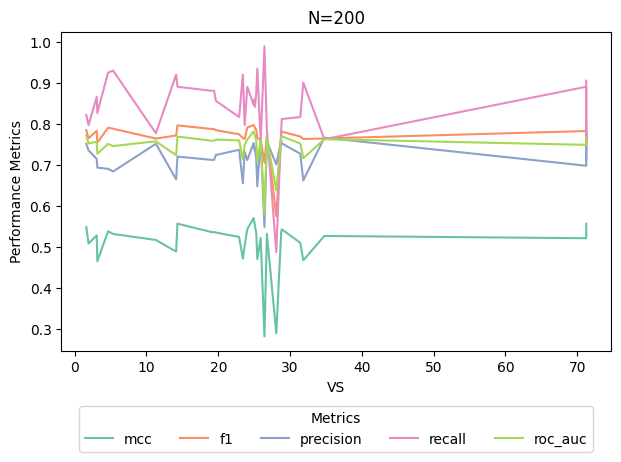

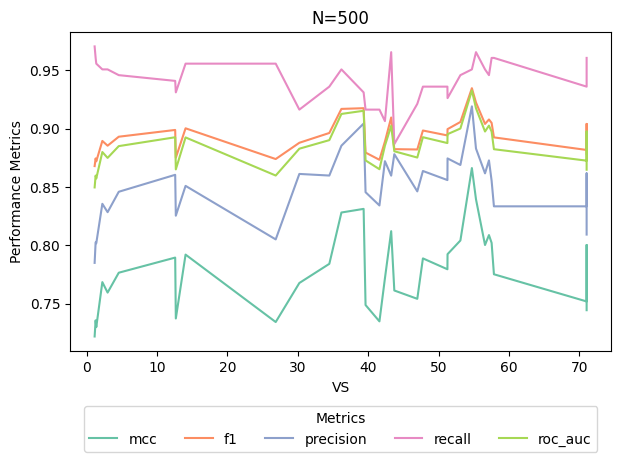

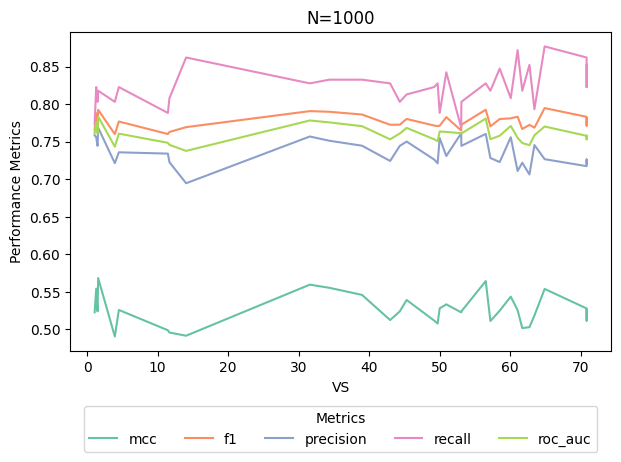

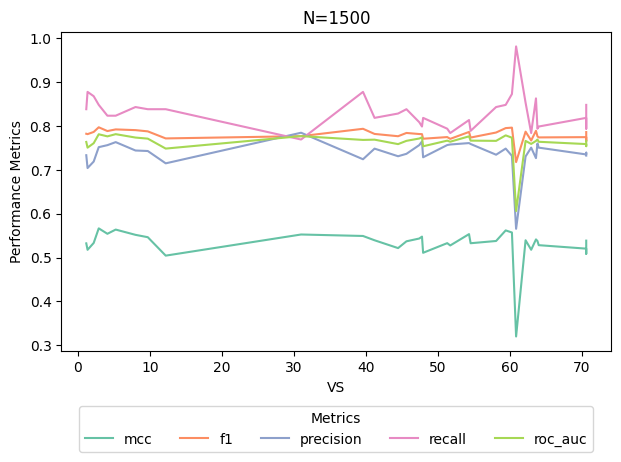

In [64]:
for name, df in results_annomatic.items():
    plot_metrics(df, name)

In [79]:
# Which one is the low performing subset in N=1500? 
test = pd.read_csv("../data/subsamples/source/annomatic/n_1500/alpha_10_idx_2.csv")
test["label"].value_counts()
test["source"].value_counts()

pd.set_option("display.max_columns", None)
pd.crosstab(test["label"], test["source"])
#pd.reset_option("display.max_columns")

source,abc-news,al-jazeera,alternet,american-greatness,american-thinker,atlanta-journal-constitution,az-central,baltimore-sun,boing-boing,boston-herald,business-insider,buzzfeed-news,cbn,cbs-news,chicago-sun-times,chicago-tribune,christian-science-monitor,christianity-today,cnbc,cnet,cnn,current-affairs,daily-beast,daily-kos,deseret-news,detroit-free-press,detroit-news,education-week,esquire,fair,fiscal-times,foreign-affairs,fortune,fox-business,fox-news,global-news,heavy,hotair,huffpost,independent-journal-review,infowars,jacobin,jezebel,judicial-watch,just-the-news,marketwatch,mediaite,military-times,montana-free-press,mother-jones,msnbc,national-catholic-register,nature,nbc-news,new-republic,new-york-daily-news,new-york-magazine,new-york-post,newsbusters,newsmax,newsone,nj.com,nowthis-news,npr,occupy-democrats,pbs-newshour,pittsburgh-post-gazette,politico,poynter,propublica,quartz,reason,rt,salon,san-diego-union-tribune,sfgate,slate,smerconish,techcrunch,teen-vogue,the-advocate-–-baton-rouge,the-american-conservative,the-american-spectator,the-atlantic,the-christian-post,the-conversation,the-dispatch,the-economist,the-federalist,the-gateway-pundit,the-guardian,the-independent,the-intercept,the-nation,the-new-yorker,the-rachel-maddow-show,the-root,the-verge,the-young-turks,time-magazine,townhall,truthout,usa-today,vanity-fair,variety,vice,vogue,voice-of-america,vox,washington-blade,washington-examiner,washington-free-beacon,washington-monthly,washington-post,washington-times,wired,wnd,zerohedge
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,3,8,3,2,16,11,9,4,9,7,6,4,7,11,4,5,69,4,13,8,2,3,4,12,10,11,5,7,1,10,3,6,10,9,9,6,5,3,3,4,4,3,8,5,3,3,4,6,6,4,10,2,10,5,6,1,13,2,6,2,8,9,8,2,6,2,4,7,8,7,5,10,2,8,8,5,1,4,7,4,10,4,7,2,7,6,8,6,7,9,12,6,6,3,6,2,3,3,5,3,0,9,4,6,8,7,0,4,8,7,6,4,3,8,2,7,3
1,5,3,9,6,12,2,9,4,5,6,7,3,1,2,9,2,4,75,1,4,2,6,7,10,7,4,9,1,3,16,5,11,7,4,5,1,7,12,4,4,6,5,11,8,1,6,4,3,4,5,4,5,0,6,6,2,6,3,11,4,6,1,7,7,8,6,3,5,8,5,5,7,2,4,1,2,3,5,3,5,6,6,4,6,5,5,4,11,7,13,8,5,7,14,5,11,7,3,16,1,9,11,6,6,8,7,6,1,6,7,2,10,11,6,4,8,8,2


In [65]:
for name, df in results_annomatic.items():
    print(f'\n{name}')
    regression_vs_metric(df, "roc_auc")


N=200
                            OLS Regression Results                            
Dep. Variable:                roc_auc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                  0.005296
Date:                Thu, 05 Dec 2024   Prob (F-statistic):              0.942
Time:                        14:28:01   Log-Likelihood:                 59.764
No. Observations:                  33   AIC:                            -115.5
Df Residuals:                      31   BIC:                            -112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7456      0.012     60.512  

In [66]:
corr_annomatic_200= calculate_correlations(annomatic_200)
corr_annomatic_500= calculate_correlations(annomatic)
corr_annomatic_1000= calculate_correlations(annomatic_1000)
corr_annomatic_1500= calculate_correlations(annomatic_1500)


print("N= 200")
print(corr_annomatic_200.to_string(index=False))  #

print("\nN=500")
print(corr_annomatic_500.to_string(index=False))  #

print("\nN= 1000")
print(corr_annomatic_1000.to_string(index=False))  #

print("\nN= 1500")
print(corr_annomatic_1500.to_string(index=False))  #


N= 200
   Metric Pearson Correlation  Pearson P-value Spearman Correlation  Spearman P-value
      mcc               0.009         0.961288               -0.066          0.715018
       f1              -0.040         0.827182               -0.209          0.243540
precision               0.090         0.616563                0.189          0.291947
   recall              -0.085         0.637196               -0.192          0.284718
  roc_auc               0.013         0.942454                0.077          0.669887

N=500
   Metric Pearson Correlation  Pearson P-value Spearman Correlation  Spearman P-value
      mcc              0.420*         0.014859              0.443**          0.009789
       f1              0.412*         0.017290               0.427*          0.013086
precision             0.458**         0.007315               0.403*          0.020127
   recall              -0.124         0.491740               -0.010          0.957044
  roc_auc             0.443**         0.